In [ ]:
pip install lmfit

     |████████████████████████████████| 292 kB 8.6 MB/s 
     |████████████████████████████████| 40 kB 4.1 MB/s 
     |████████████████████████████████| 98 kB 5.8 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84402 sha256=687dc51e141dd329f465c35be5f17975de7c51154ef70ef87de345af7c5f9f8f
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
  Created wheel for asteval: filename=asteval-0.9.26-py3-none-any.whl size=17648 sha256=b0ca6fd3d644b8f9f9a14b44ef880b945e1fe899bf51234f6f47942af10ef068
  Stored in directory: /root/.cache/pip/wheels/4c/e9/f0/bc343d5b77d2fded45177f424a6b0b9224b92ff6e7c150bad4
Successfully built lmfit asteval


In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from lmfit.models import LinearModel, PseudoVoigtModel

In [ ]:
xrd_df = pd.read_csv('chromite_calibration.csv')

In [ ]:
xrd_df.head()

,twotheta,98-counts,99-counts,995-counts,9975-counts
0,34.05,2529,3197,2094,1321
1,34.10,2454,3304,2053,1545
2,34.15,2519,3468,2068,1503
3,34.20,2539,3317,2082,1482
4,34.25,2614,3542,2149,1527


In [ ]:
def PseudoVoigt_plus_Linear(x_fit, y_fit):
  x = x_fit
  y = y_fit

  peak1 = PseudoVoigtModel(prefix='first_')
  peak2 = PseudoVoigtModel(prefix='second_')
  peak3 = PseudoVoigtModel(prefix='third_')
  background = LinearModel(prefix='linear_')

  pars = background.guess(y, x=x)
  pars.update(peak1.make_params())
  pars['linear_slope'].set(value=100, max=500, min=0)
  pars['first_center'].set(value=34.9, min=34.7, max=35.1)
  pars['first_fwhm'].set(value=0.2, min=0.1)
  pars['first_amplitude'].set(value=2000, min=100)

  pars.update(peak2.make_params())
  pars['second_center'].set(value=35.9, min=35.8, max=36.0)
  pars['second_fwhm'].set(value=0.2, max=0.3)
  pars['second_amplitude'].set(value=500, min=10, max=500)
  pars['second_sigma'].set(value=0.5, max=1.5)

  pars.update(peak3.make_params())
  pars['third_center'].set(value=36.6)
  pars['third_fwhm'].set(value=0.1)
  pars['third_amplitude'].set(value=6000)

  xrd_model = peak1 + peak2 + peak3 + background

  results = xrd_model.fit(y, params=pars, x=x)

  results.plot()
  print(results.fit_report())

  fig, axes = plt.subplots(figsize=(12.8, 4.8))
  comps = results.eval_components(x=x)
  axes.plot(x, y)
  axes.plot(x, comps['first_'], '--', label='Peak 1')
  axes.plot(x, comps['second_'], '--', label='Peak 2')
  axes.plot(x, comps['third_'], '--', label='Peak 3')
  axes.plot(x, comps['linear_'], '--', label='Background')
  axes.legend()

  plt.show()

In [ ]:
def PseudoVoigt_plus_Linear1(x_fit, y_fit):
  x = x_fit
  y = y_fit

  peak1 = PseudoVoigtModel(prefix='first_')
  peak2 = PseudoVoigtModel(prefix='second_')
  peak3 = PseudoVoigtModel(prefix='third_')
  background = LinearModel(prefix='linear_')

  pars = background.guess(y, x=x)
  pars['linear_slope'].set(value=247.4)
  pars['linear_intercept'].set(value=-5981.8)

  pars.update(peak1.make_params())
  pars['first_center'].set(value=34.9, min=34.7, max=35.1)
  pars['first_fwhm'].set(value=0.2, min=0.1)
  pars['first_amplitude'].set(value=2000, min=100)

  pars.update(peak2.make_params())
  pars['second_center'].set(value=35.9, min=35.8, max=36.0)
  pars['second_fwhm'].set(value=0.2, max=0.3)
  pars['second_amplitude'].set(value=500, min=10, max=500)
  pars['second_sigma'].set(value=0.5, max=1.5)

  pars.update(peak3.make_params())
  pars['third_center'].set(value=36.6)
  pars['third_fwhm'].set(value=0.1)
  pars['third_amplitude'].set(value=6000)

  xrd_model = peak1 + peak2 + peak3 + background

  results = xrd_model.fit(y, params=pars, x=x)

  results.plot()
  print(results.fit_report())

  fig, axes = plt.subplots(figsize=(12.8, 4.8))
  comps = results.eval_components(x=x)
  axes.plot(x, y)
  axes.plot(x, comps['first_'], '--', label='Peak 1')
  axes.plot(x, comps['second_'], '--', label='Peak 2')
  axes.plot(x, comps['third_'], '--', label='Peak 3')
  axes.plot(x, comps['linear_'], '--', label='Background')
  axes.legend()

  plt.show()

[[Model]]
    (((Model(pvoigt, prefix='first_') + Model(pvoigt, prefix='second_')) + Model(pvoigt, prefix='third_')) + Model(linear, prefix='linear_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 158
    # data points      = 68
    # variables        = 14
    chi-square         = 24368483.8
    reduced chi-square = 451268.218
    Akaike info crit   = 897.671958
    Bayesian info crit = 928.745066
##  Warning: uncertainties could not be estimated:
    first_center:      at initial value
[[Variables]]
    linear_slope:      245.762782 (init = 247.4)
    linear_intercept: -5972.50070 (init = -5981.8)
    first_amplitude:   3949.61105 (init = 2000)
    first_center:      34.9000000 (init = 34.9)
    first_sigma:       0.33037616 (init = 1)
    first_fraction:    0.15158393 (init = 0.5)
    first_fwhm:        0.2 (fixed)
    first_height:      5341.05690 == '(((1-first_fraction)*first_amplitude)/max(1e-15, (first_sigma*sqrt(pi/log(2))))+(first_fraction*first

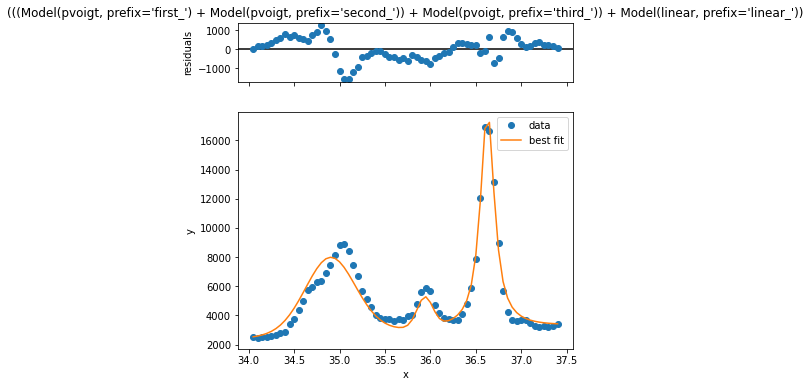

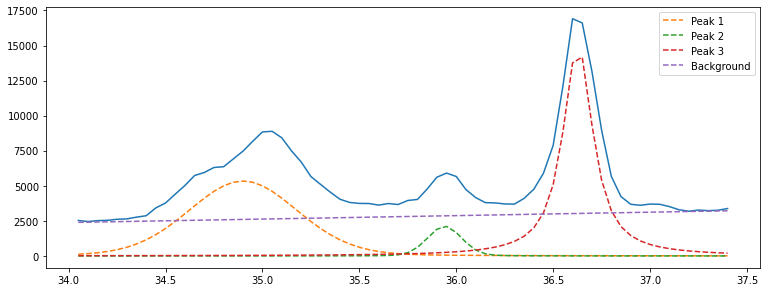

In [ ]:
PseudoVoigt_plus_Linear1(xrd_df['twotheta'], xrd_df['98-counts'])

[[Model]]
    (((Model(pvoigt, prefix='first_') + Model(pvoigt, prefix='second_')) + Model(pvoigt, prefix='third_')) + Model(linear, prefix='linear_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 431
    # data points      = 68
    # variables        = 14
    chi-square         = 5189017.98
    reduced chi-square = 96092.9256
    Akaike info crit   = 792.493218
    Bayesian info crit = 823.566326
[[Variables]]
    linear_slope:      248.179342 +/- 85.8809468 (34.60%) (init = 420.4688)
    linear_intercept: -6202.85050 +/- 3176.33825 (51.21%) (init = -9750.158)
    first_amplitude:   4426.11544 +/- 760.358440 (17.18%) (init = 2000)
    first_center:      34.9807414 +/- 0.00720654 (0.02%) (init = 34.9)
    first_sigma:       0.29982795 +/- 0.01181724 (3.94%) (init = 1)
    first_fraction:    0.45420157 +/- 0.30915939 (68.07%) (init = 0.5)
    first_fwhm:        0.2 (fixed)
    first_height:      5918.87623 +/- 311.293904 (5.26%) == '(((1-first_fraction)*f

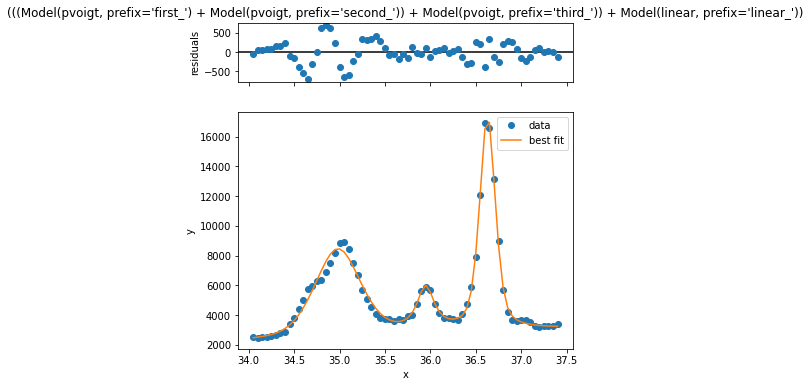

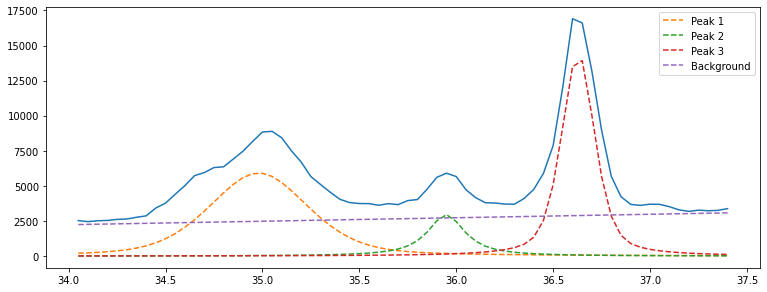

In [ ]:
PseudoVoigt_plus_Linear(xrd_df['twotheta'], xrd_df['98-counts'])

[[Model]]
    (((Model(pvoigt, prefix='first_') + Model(pvoigt, prefix='second_')) + Model(pvoigt, prefix='third_')) + Model(linear, prefix='linear_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13590
    # data points      = 68
    # variables        = 14
    chi-square         = 3660932.67
    reduced chi-square = 67795.0495
    Akaike info crit   = 768.773014
    Bayesian info crit = 799.846122
##  Warning: uncertainties could not be estimated:
    first_fraction:    at boundary
    second_center:     at initial value
    second_fraction:   at boundary
[[Variables]]
    linear_slope:      46.4159191 (init = 100)
    linear_intercept:  1633.91413 (init = -7856.25)
    first_amplitude:   3027.39138 (init = 2000)
    first_center:      34.8865562 (init = 34.9)
    first_sigma:       0.32924937 (init = 1)
    first_fraction:    3.2918e-14 (init = 0.5)
    first_fwhm:        0.2 (fixed)
    first_height:      4318.98218 == '(((1-first_fraction)*first_amp

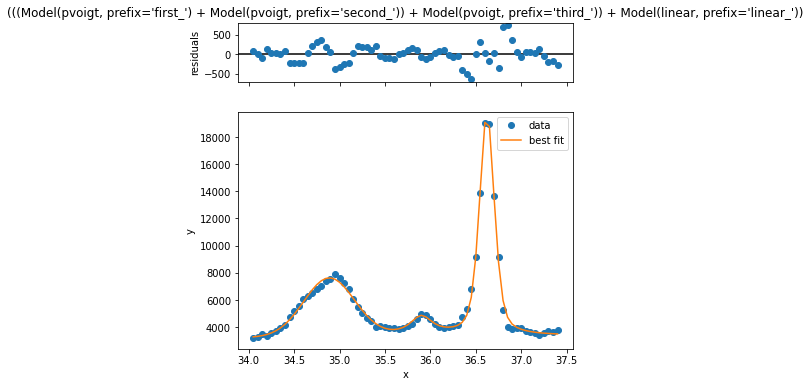

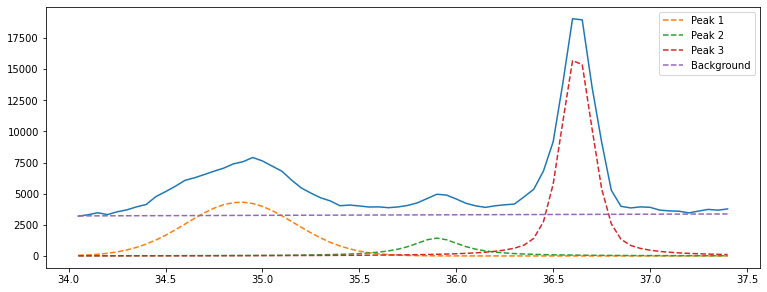

In [ ]:
PseudoVoigt_plus_Linear(xrd_df['twotheta'], xrd_df['99-counts'])

In [ ]:
def PseudoVoigt_plus_Linear2(x_fit, y_fit):
  x = x_fit
  y = y_fit

  peak1 = PseudoVoigtModel(prefix='first_')
  peak2 = PseudoVoigtModel(prefix='second_')
  peak3 = PseudoVoigtModel(prefix='third_')
  background = LinearModel(prefix='linear_')

  pars = background.guess(y, x=x)
  pars['linear_slope'].set(value=93)
  pars['linear_intercept'].set(value=-1130)
  
  pars.update(peak1.make_params())
  pars['first_center'].set(value=34.9, min=34.8, max=35.0)
  pars['first_fwhm'].set(value=0.2, min=0.1)
  pars['first_amplitude'].set(value=2000, min=100)

  pars.update(peak2.make_params())
  pars['second_center'].set(value=35.9, min=35.7, max=36.1)
  pars['second_fwhm'].set(value=0.2, max=0.5)
  pars['second_amplitude'].set(value=500, min=10)

  pars.update(peak3.make_params())
  pars['third_center'].set(value=36.6)
  pars['third_fwhm'].set(value=0.1)
  pars['third_amplitude'].set(value=6000, max=10000)


  xrd_model = peak1 + peak2 + peak3 + background

  results = xrd_model.fit(y, params=pars, x=x)

  results.plot()
  print(results.fit_report())

  fig, axes = plt.subplots(figsize=(12.8, 4.8))
  
  comps = results.eval_components(x=x)
  axes.plot(x, y)
  axes.plot(x, comps['first_'], '--', label='Peak 1')
  axes.plot(x, comps['second_'], '--', label='Peak 2')
  axes.plot(x, comps['third_'], '--', label='Peak 3')
  axes.plot(x, comps['linear_'], '--', label='Background')
  axes.legend()

  plt.show()

[[Model]]
    (((Model(pvoigt, prefix='first_') + Model(pvoigt, prefix='second_')) + Model(pvoigt, prefix='third_')) + Model(linear, prefix='linear_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3768
    # data points      = 68
    # variables        = 14
    chi-square         = 2646259.52
    reduced chi-square = 49004.8059
    Akaike info crit   = 746.702200
    Bayesian info crit = 777.775307
##  Warning: uncertainties could not be estimated:
    first_fraction:    at boundary
    second_center:     at initial value
    second_fraction:   at boundary
[[Variables]]
    linear_slope:      5.14205155 (init = 93)
    linear_intercept:  1843.62471 (init = -1130)
    first_amplitude:   1645.61739 (init = 2000)
    first_center:      34.9360048 (init = 34.9)
    first_sigma:       0.32969025 (init = 1)
    first_fraction:    3.3307e-16 (init = 0.5)
    first_fwhm:        0.2 (fixed)
    first_height:      2344.55570 == '(((1-first_fraction)*first_amplitud

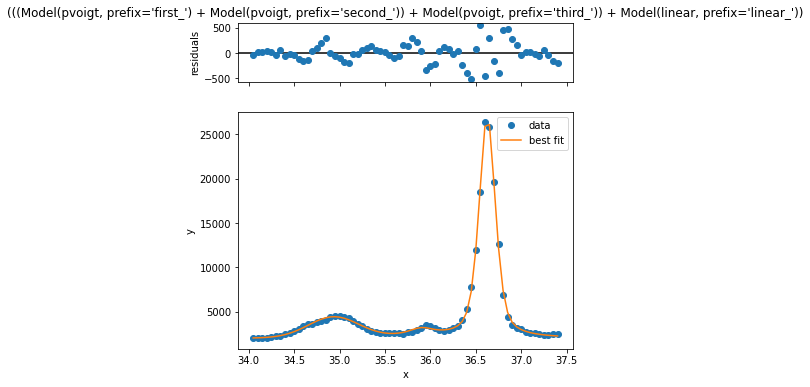

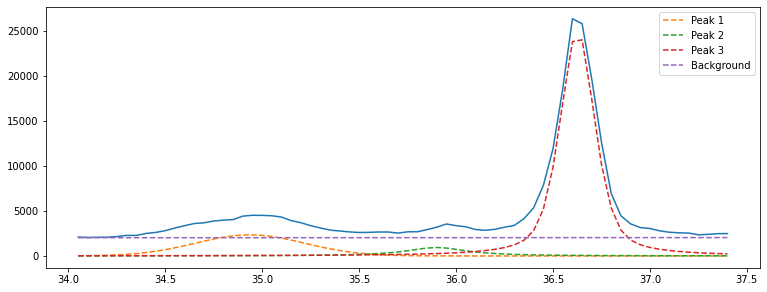

In [ ]:
PseudoVoigt_plus_Linear2(xrd_df['twotheta'], xrd_df['995-counts'])

In [ ]:
def PseudoVoigt_plus_Linear4(x_fit, y_fit):
  x = x_fit
  y = y_fit

  peak1 = PseudoVoigtModel(prefix='first_')
  peak2 = PseudoVoigtModel(prefix='second_')
  peak3 = PseudoVoigtModel(prefix='third_')
  background = LinearModel(prefix='linear_')

  pars = background.guess(y, x=x)
  pars['linear_slope'].set(value=157.3)
  pars['linear_intercept'].set(value=-4034)
  
  pars.update(peak1.make_params())
  pars['first_center'].set(value=34.9, min=34.8, max=35.0)
  pars['first_fwhm'].set(value=0.2, min=0.1)
  pars['first_amplitude'].set(value=2000, min=100)

  pars.update(peak2.make_params())
  pars['second_center'].set(value=35.9, min=35.7, max=36.1)
  pars['second_fwhm'].set(value=0.2, max=0.5)
  pars['second_amplitude'].set(value=500, min=10)

  pars.update(peak3.make_params())
  pars['third_center'].set(value=36.6)
  pars['third_fwhm'].set(value=0.1)
  pars['third_amplitude'].set(value=6000, max=10000)


  xrd_model = peak1 + peak2 + peak3 + background

  results = xrd_model.fit(y, params=pars, x=x)

  results.plot()
  print(results.fit_report())

  fig, axes = plt.subplots(figsize=(12.8, 4.8))
  
  comps = results.eval_components(x=x)
  axes.plot(x, y)
  axes.plot(x, comps['first_'], '--', label='Peak 1')
  axes.plot(x, comps['second_'], '--', label='Peak 2')
  axes.plot(x, comps['third_'], '--', label='Peak 3')
  axes.plot(x, comps['linear_'], '--', label='Background')
  axes.legend()

  plt.show()

[[Model]]
    (((Model(pvoigt, prefix='first_') + Model(pvoigt, prefix='second_')) + Model(pvoigt, prefix='third_')) + Model(linear, prefix='linear_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13201
    # data points      = 68
    # variables        = 14
    chi-square         = 1746804.02
    reduced chi-square = 32348.2225
    Akaike info crit   = 718.457767
    Bayesian info crit = 749.530875
##  Warning: uncertainties could not be estimated:
    second_center:     at initial value
    second_fraction:   at boundary
[[Variables]]
    linear_slope:      13.6648714 (init = 157.3)
    linear_intercept:  949.368392 (init = -4034)
    first_amplitude:   853.222907 (init = 2000)
    first_center:      34.9321574 (init = 34.9)
    first_sigma:       0.32554283 (init = 1)
    first_fraction:    9.1819e-08 (init = 0.5)
    first_fwhm:        0.2 (fixed)
    first_height:      1231.09667 == '(((1-first_fraction)*first_amplitude)/max(1e-15, (first_sigma*sqrt

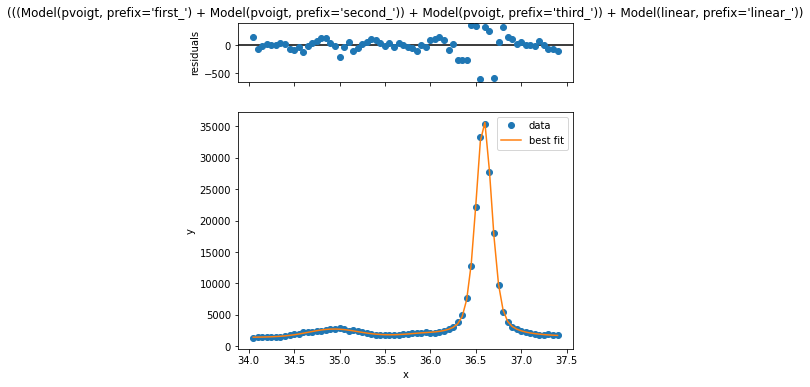

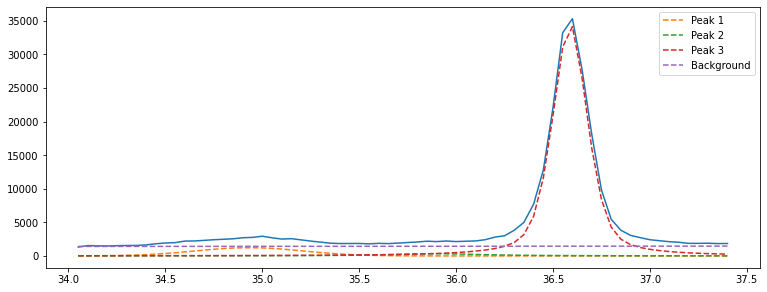

In [ ]:
PseudoVoigt_plus_Linear4(xrd_df['twotheta'], xrd_df['9975-counts'])